# Library Import

In [803]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To set figure size
from matplotlib.pyplot import figure

# 1 - Business Understanding
### Scenario:
Luis Xaviar the team analyst of the football team of Eibar FC recently was asked by the manager to review the performance of their last match
the manager wanted to know how he could improve his style of play in three areas of the game, passing, shooting and defending.
this would help improve not only his teams performance but other teams might find it useful as well to improve their own performance.
Using this football data Luis focused on these areas and came up with the following problems

## 1.Passing:
### You would look at this data to try and improve the build up of play and the potential of successful counter attacking:  
1.Analyzing the correlation between distance of a pass with the success rate.

2.Investigating the effect of fatigue on a players passing. 

3.Investigating the likelihood of a pass being inaccurate in the second half 

## 2.Defense
### You would look at this data to try and strengthen defense to reduce amount of goals scored:
4.Analyzing the outcomes of tackles.

5.Investigating which team is more likely to fail a tackle in the first half compared to the second half

## 3.Attacking
### Look at this data to try and maximize your goal scoring efficiency and increase the likelihood of scoring a goal:
6.Analyzing the influence of a player shooting from a first touch on the probability of it leading to a goal.

7.Investigating the volume of shots attempted between the first and second half.

8.Analyzing how accurate players are with their heads to hit a shot on target.

9.Analyzing the probability of a player trying to take a regular shot on goal near the end of the first and second halves(+/- 5 minutes before the half ends)

## Numerical Predictions
1. Pass Success prediction- Are we able to predict the success probability of a pass using time of the match and the distance of the pass


# 2 - Data Mining:


## Library Imports

In [804]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To set figure size
from matplotlib.pyplot import figure

## Data Import

In [805]:
import pandas as pd
data= pd.read_csv("outputDataMining.csv")

# 3 - Data Cleaning:

In [806]:
# Drop the columns that are not needed

data.drop(['bad_behaviour_card'], axis=1, inplace=True)
data.drop(['ball_receipt_outcome'], axis=1, inplace=True)
data.drop(['ball_recovery_recovery_failure'], axis=1, inplace=True)
data.drop(['carry_end_location'], axis=1, inplace=True)
data.drop(['clearance_body_part'], axis=1, inplace=True)
data.drop(['clearance_head'], axis=1, inplace=True)
data.drop(['clearance_left_foot'], axis=1, inplace=True)
data.drop(['clearance_right_foot'], axis=1, inplace=True)
data.drop(['counterpress'], axis=1, inplace=True)
data.drop(['dribble_no_touch'], axis=1, inplace=True)
data.drop(['foul_committed_advantage'], axis=1, inplace=True)
data.drop(['foul_committed_card'], axis=1, inplace=True)
data.drop(['foul_committed_type'], axis=1, inplace=True)
data.drop(['foul_won_advantage'], axis=1, inplace=True)
data.drop(['goalkeeper_body_part'], axis=1, inplace=True)
data.drop(['goalkeeper_end_location'], axis=1, inplace=True)
data.drop(['location'], axis=1, inplace=True)
data.drop(['match_id'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['index'], axis=1, inplace=True)
data.drop(['miscontrol_aerial_won'], axis=1, inplace=True)
data.drop(['off_camera'], axis=1, inplace=True)
data.drop(['out'], axis=1, inplace=True)
data.drop(['pass_angle'], axis=1, inplace=True)
data.drop(['pass_assisted_shot_id'], axis=1, inplace=True)
data.drop(['pass_end_location'], axis=1, inplace=True)
data.drop(['pass_cut_back'], axis=1, inplace=True)
data.drop(['pass_goal_assist'], axis=1, inplace=True)
data.drop(['possession_team_id'], axis=1, inplace=True)
data.drop(['pass_inswinging'], axis=1, inplace=True)
data.drop(['pass_miscommunication'], axis=1, inplace=True)
data.drop(['pass_shot_assist'], axis=1, inplace=True)
data.drop(['pass_no_touch'], axis=1, inplace=True)
data.drop(['pass_outswinging'], axis=1, inplace=True)
data.drop(['pass_recipient'], axis=1, inplace=True)
data.drop(['player_id'], axis=1, inplace=True)
data.drop(['pass_straight'], axis=1, inplace=True)
data.drop(['pass_switch'], axis=1, inplace=True)
data.drop(['pass_through_ball'], axis=1, inplace=True)
data.drop(['player'], axis=1, inplace=True)
data.drop(['related_events'], axis=1, inplace=True)
data.drop(['shot_aerial_won'], axis=1, inplace=True)
data.drop(['shot_end_location'], axis=1, inplace=True)
data.drop(['shot_freeze_frame'], axis=1, inplace=True)
data.drop(['shot_key_pass_id'], axis=1, inplace=True)
data.drop(['shot_statsbomb_xg'], axis=1, inplace=True)
data.drop(['shot_type'], axis=1, inplace=True)
data.drop(['substitution_outcome'], axis=1, inplace=True)
data.drop(['substitution_replacement'], axis=1, inplace=True)
data.drop(['tactics'], axis=1, inplace=True)
data.drop(['timestamp'], axis=1, inplace=True)
data.drop(['team_id'], axis=1, inplace=True)
data.drop(['type'], axis=1, inplace=True)
data.drop(['under_pressure'], axis=1, inplace=True)
data.drop(['block_deflection'], axis=1, inplace=True)
data.drop(['clearance_aerial_won'], axis=1, inplace=True)
data.drop(['dribble_nutmeg'], axis=1, inplace=True)
data.drop(['dribble_outcome'], axis=1, inplace=True)
data.drop(['foul_won_defensive'], axis=1, inplace=True)
data.drop(['goalkeeper_position'], axis=1, inplace=True)
data.drop(['interception_outcome'], axis=1, inplace=True)
data.drop(['pass_aerial_won'], axis=1, inplace=True)
data.drop(['pass_cross'], axis=1, inplace=True)
data.drop(['pass_deflected'], axis=1, inplace=True)
data.drop(['pass_height'], axis=1, inplace=True)
data.drop(['pass_type'], axis=1, inplace=True)
#data.drop(['second'], axis=1, inplace=True)
#data.drop(['minute'], axis=1, inplace=True)
data.drop(['duration'], axis=1, inplace=True)
data.drop(['goalkeeper_outcome'], axis=1, inplace=True)
data.drop(['goalkeeper_technique'], axis=1, inplace=True)
data.drop(['goalkeeper_type'], axis=1, inplace=True)
data.drop(['pass_body_part'], axis=1, inplace=True)
data.drop(['play_pattern'], axis=1, inplace=True)
data.drop(['position'], axis=1, inplace=True)
data.drop(['possession_team'], axis=1, inplace=True)
#data.drop(['shot_body_part'], axis=1, inplace=True)
data.drop(['shot_deflected'], axis=1, inplace=True)
data.drop(['possession'], axis=1, inplace=True)
data.drop(['pass_technique'], axis=1, inplace=True)

## Missing Values

In [807]:
# Drop the rows where all elements are missing.
columns_to_check =['duel_outcome','duel_type','pass_length','pass_outcome','shot_first_time','shot_outcome','shot_technique']
data.dropna(subset=columns_to_check, how='all', inplace=True)

# if pass length is not null and pass outcome is null, then pass outcome is complete
data.loc[data['pass_length'].notnull() & data['pass_outcome'].isnull(),'pass_outcome'] = 'Complete'

# if duel type is not null and duel outcome is null, then duel outcome is lost
data.loc[data['duel_type'].notnull() & data['duel_outcome'].isnull(),'duel_outcome'] = 'Lost'

# if shot outcome is not null and shot first time is null, then shot first time is false
data.loc[data['shot_outcome'].notnull() & data['shot_first_time'].isnull(),'shot_first_time'] = 'False'

# Fill the missing values with the value N/A
data.fillna("N/A", inplace = True)

# Convert the pass length to float and round to 1 decimal place
#Ran into problem with converting pass_length to N/A had to convert to numeric first and then fill the missing values with 0 instead of N/A
data['pass_length'] = pd.to_numeric(data['pass_length'], errors='coerce').fillna(0).round(1)
data['pass_length'] = data ['pass_length']


# Convert the shot first time to float
data['shot_first_time'] = data['shot_first_time'].astype(str)

# Checking the missing values in the dataset.
print(data.isnull().sum())

print(data)
#data.to_csv('data.csv', index=False)  # save as csv file

duel_outcome       0
duel_type          0
minute             0
pass_length        0
pass_outcome       0
period             0
second             0
shot_body_part     0
shot_first_time    0
shot_outcome       0
shot_technique     0
team               0
dtype: int64
     duel_outcome duel_type  minute  pass_length pass_outcome  period  second  \
6             N/A       N/A       0          7.3     Complete       1       0   
7             N/A       N/A       0          3.9     Complete       1       0   
8             N/A       N/A       0         30.1     Complete       1       4   
9             N/A       N/A       0         35.2     Complete       1       7   
10            N/A       N/A       0         29.6     Complete       1      13   
...           ...       ...     ...          ...          ...     ...     ...   
2373          N/A       N/A      76          0.0          N/A       2      55   
2374          N/A       N/A      77          0.0          N/A       2      52   
2375  

C:\Users\wwwno\AppData\Local\Temp\ipykernel_12368\1857169728.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("N/A", inplace = True)


# 4 - Data Exploration:

## Univaraite Analysis

## Categorical 

In [808]:
# Univariate for categorical variables such as duel outcome, duel type, pass outcome, shot body part, shot first time, shot outcome, shot technique, team
print(data.duel_outcome.unique())
print(data.duel_type.unique())
print(data.pass_outcome.unique())
print(data.shot_body_part.unique())
print(data.shot_first_time.unique())
print(data.shot_outcome.unique())
print(data.shot_technique.unique())
print(data.team.unique())

['N/A' 'Lost' 'Success In Play' 'Lost Out' 'Won' 'Lost In Play']
['N/A' 'Aerial Lost' 'Tackle']
['Complete' 'Out' 'Incomplete' 'Unknown' 'Pass Offside' 'Injury Clearance'
 'N/A']
['N/A' 'Head' 'Right Foot' 'Left Foot']
['N/A' 'False' 'True']
['N/A' 'Off T' 'Saved' 'Blocked' 'Goal' 'Post' 'Wayward']
['N/A' 'Normal' 'Half Volley' 'Volley']
['Eibar' 'Levante UD']


### Duel Outcome

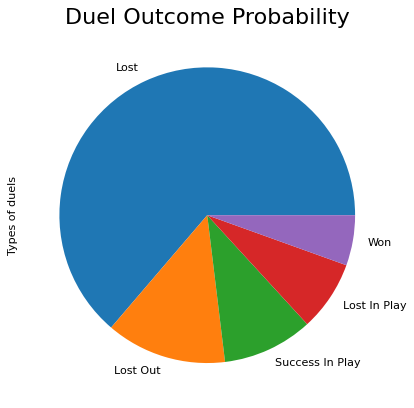

Around 62% of duels are lost while approximately 10% are won in play and 5% are only won


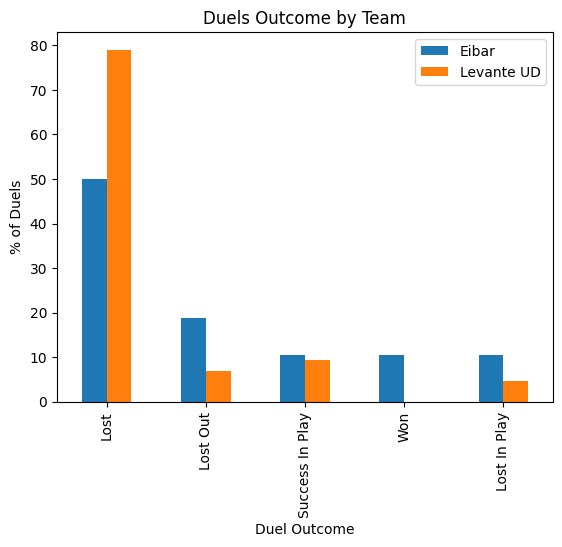

Eibar has a higher percentage of duels won than Levante UD


In [809]:
#________________________________________Duel Outcome_______________________________________________________

#Filtering the N/A out for dueling outcome
filtered_DuelOutcome = data[data['duel_outcome'] != 'N/A']

#Using a pie chart to explore duel outcome data
#First calculate the percentage of each Duel outcome .
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
filtered_DuelOutcome2 = filtered_DuelOutcome['duel_outcome'].value_counts(normalize=True)
filtered_DuelOutcome2.plot.pie()
plt.title("Duel Outcome Probability", size=20)
plt.ylabel("Types of duels")
plt.show()
print("Around 62% of duels are lost while approximately 10% are won in play and 5% are only won") 



# Filter data by team
eibar_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Eibar']
levante_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Levante UD'] 

# Calculate the percentage of each duel outcome probability by team.
eibar_data_percentages = eibar_data['duel_outcome'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['duel_outcome'].value_counts(normalize=True)*100

# Plot the bar chart for the duel outcome by team .
# It was a challenge to be able to joint the two teams together and compare them tried with hue at first. settled with using concat
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Duels Outcome by Team")
plt.xlabel("Duel Outcome")
plt.ylabel("% of Duels")
plt.show() #Show the plot
print("Eibar has a higher percentage of duels won than Levante UD") 



### Duel Type

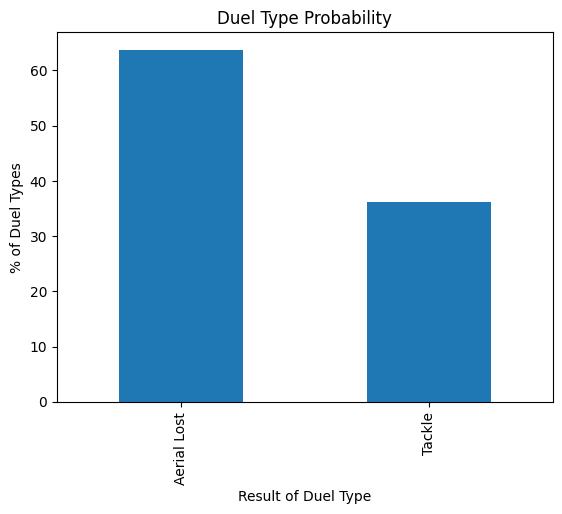

Approximately 2/3 of duels are aerial duels and the other 1/3 are ground duels


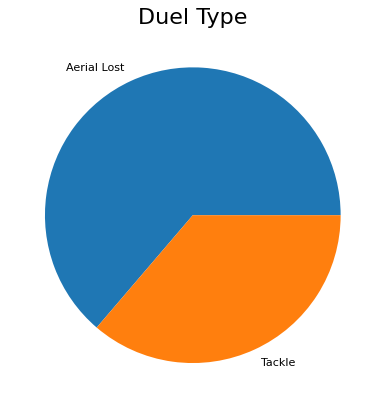

There is a around a 66% chance of duel being an aerial 


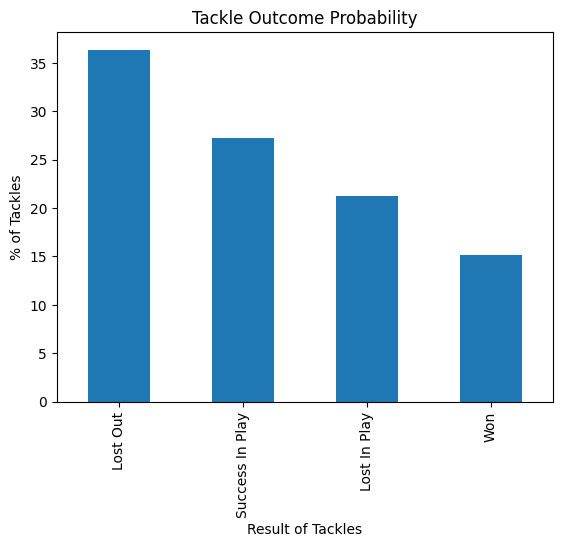

Tackles have approximately a 40% success rate and a 60% failure rate


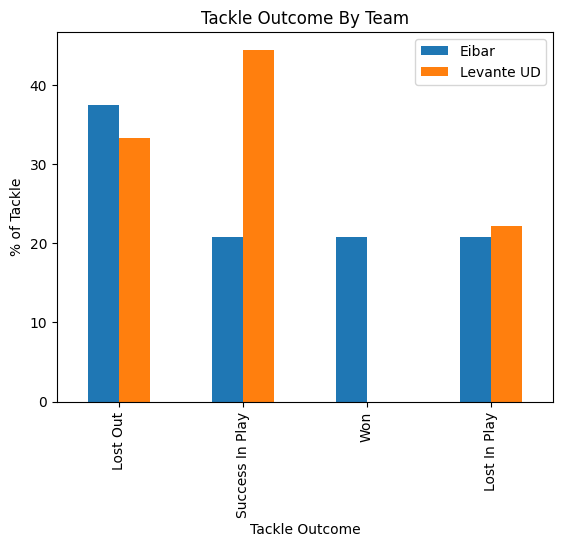

Levante have a marginally better tackling success rate than Eibar


In [810]:
#________________________________________Duel Type_______________________________________________________

#Filtering the N/A out for dueling type
filtered_DuelType = data[data['duel_type'] != 'N/A']
# Let's calculate the percentage of each duel type probability.
duelType_percentage = filtered_DuelType['duel_type'].value_counts(normalize=True)*100
duelType_percentage.plot.bar()
plt.title("Duel Type Probability")
plt.xlabel("Result of Duel Type")
plt.ylabel("% of Duel Types")
plt.show() #Show the plot
print("Approximately 2/3 of duels are aerial duels and the other 1/3 are ground duels") 

#OR maybe use a pie chart to explore the education data 
#First calculate the percentage of each education category.
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
filtered_DuelType1 = filtered_DuelType['duel_type'].value_counts(normalize=True)
filtered_DuelType1.plot.pie()
plt.title("Duel Type", size=20)
plt.ylabel("")
plt.show()
print("There is a around a 66% chance of duel being an aerial ") 

#Filtering the N/A out for dueling outcome and have to be a tackle
filtered_DuelOutcome = data[(data['duel_outcome'] != 'N/A') & (data['duel_type'] == 'Tackle')]
# Calculate the percentage of each duel outcome probability.
duel_percentage = filtered_DuelOutcome['duel_outcome'].value_counts(normalize=True)*100
duel_percentage.plot.bar()
plt.title("Tackle Outcome Probability")
plt.xlabel("Result of Tackles")
plt.ylabel("% of Tackles")
plt.show() #Show the plot
print("Tackles have approximately a 40% success rate and a 60% failure rate") 


# Filter data by team
eibar_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Eibar']
levante_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Levante UD'] 

# Calculate the percentage of each tackle outcome probability by team.
eibar_data_percentages = eibar_data['duel_outcome'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['duel_outcome'].value_counts(normalize=True)*100

# Plot the bar chart for the tackle outcome by team .
# It was a challenge to be able to joint the two teams together and compare them tried with hue at first. settled with using concat
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Tackle Outcome By Team")
plt.xlabel("Tackle Outcome")
plt.ylabel("% of Tackle")
plt.show() #Show the plot
print("Levante have a marginally better tackling success rate than Eibar") 



### Pass outcome

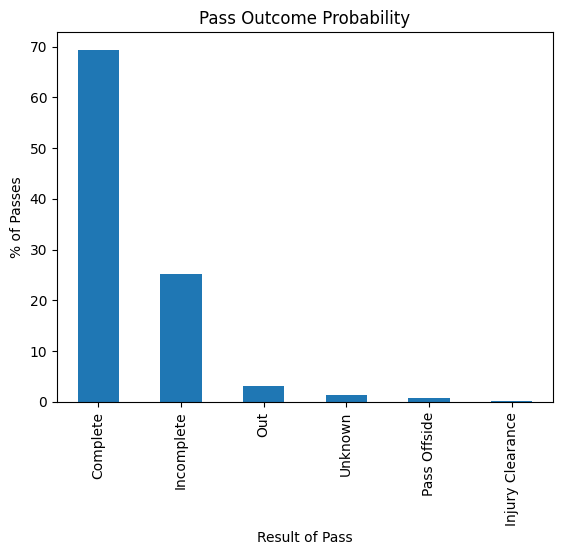

Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted


In [811]:
#________________________________________Pass Outcome_______________________________________________________

#Filtering the N/A out for dueling outcome
filtered_PassOutcome = data[data['pass_outcome'] != 'N/A']
# Calculate the percentage of each pass outcome probability.
passOutcome_percentage = filtered_PassOutcome['pass_outcome'].value_counts(normalize=True)*100
passOutcome_percentage.plot.bar()
plt.title("Pass Outcome Probability")
plt.xlabel("Result of Pass")
plt.ylabel("% of Passes")
plt.show() #Show the plot
print("Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted") 



### Shot body part

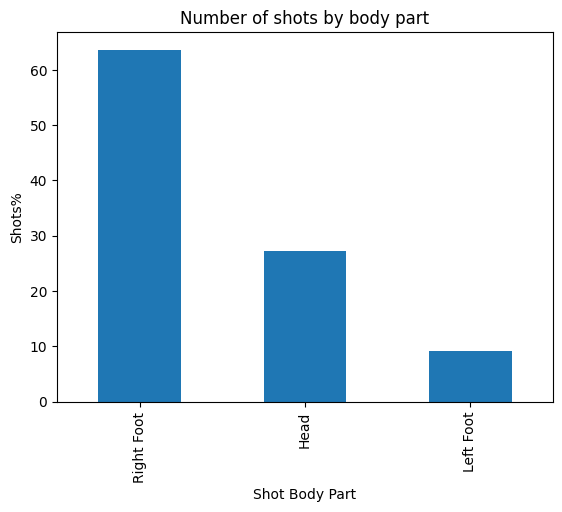

Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot


In [812]:
#________________________________________Shot body part_______________________________________________________

#Filtering the N/A out for dueling outcome
filtered_Shot_Body_Part = data[data['shot_body_part'] != 'N/A']
# Calculate the percentage of each pass outcome probability.
shot_Body_Part_Percentage = filtered_Shot_Body_Part['shot_body_part'].value_counts(normalize=True)*100
shot_Body_Part_Percentage.plot.bar()
plt.title("Number of shots by body part")
plt.xlabel("Shot Body Part")
plt.ylabel("Shots%")
plt.show() #Show the plot
print("Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot") 


### Shot first time

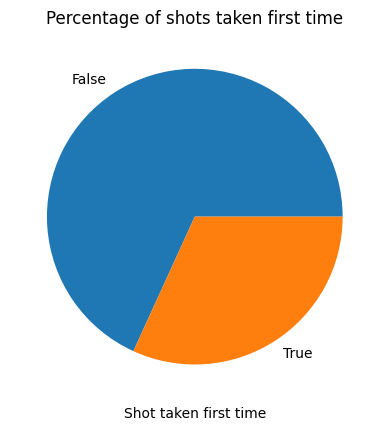

Approximately a little more than 30% of shots taken are done so first time


In [819]:
#________________________________________Shot first time_______________________________________________________

#Filtering the N/A out for shooting first time outcome
filtered_Shot_firstime = data[data['shot_first_time'] != 'N/A']

# Calculate the total of shots being taken first time.
shot_firstTime_Percentage = filtered_Shot_firstime['shot_first_time'].value_counts(normalize=True)*100
shot_firstTime_Percentage.plot.pie()
plt.title("Percentage of shots taken first time")
plt.xlabel("Shot taken first time")
plt.ylabel("")
plt.show() #Show the plot
print("Approximately a little more than 30% of shots taken are done so first time") 

### Shot outcome


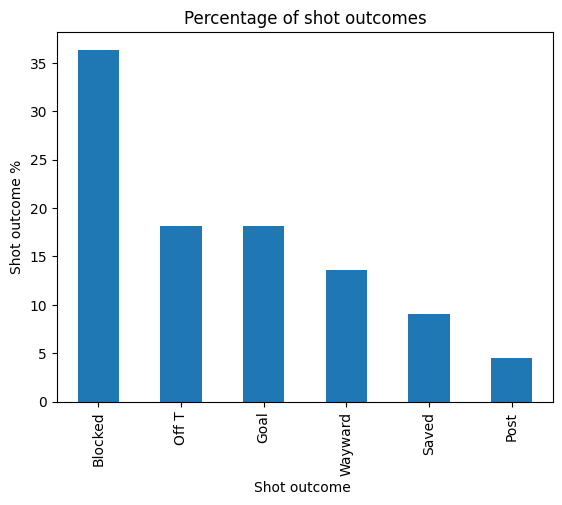

From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked


In [825]:
#________________________________________Shot outcome_______________________________________________________

#Filtering the N/A out for Shot outcome  outcome
filtered_Shot_outcome = data[data['shot_outcome'] != 'N/A']

# Calculate the total of shots being taken first time.
shot_outcome_Percentage = filtered_Shot_outcome['shot_outcome'].value_counts(normalize=True)*100
shot_outcome_Percentage.plot.bar()
plt.title("Percentage of shot outcomes")
plt.xlabel("Shot outcome ")
plt.ylabel("Shot outcome %")
plt.show() #Show the plot
print("From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked") 

### Shot technique

### Team

## Numerical Variables

In [814]:
summaryNumerical = data.describe()
print(summaryNumerical)



            minute  pass_length       period       second
count  1023.000000  1023.000000  1023.000000  1023.000000
mean     46.312805    20.932942     1.500489    29.707722
std      25.925829    16.722137     0.500244    16.839510
min       0.000000     0.000000     1.000000     0.000000
25%      25.000000     9.900000     1.000000    16.000000
50%      45.000000    16.500000     2.000000    30.000000
75%      68.000000    29.050000     2.000000    44.000000
max      93.000000   101.400000     2.000000    59.000000


## Categorical Variables 

In [815]:
print("Duel Outcome:" + data.duel_outcome.unique())
print("Duel Type:" + data.duel_type.unique())
print("Pass Outcome:" + data.pass_outcome.unique())
print("Shot Body Part:" + data.shot_body_part.unique())
print("Shot First Time:" + data.shot_first_time.unique())
print("Shot Outcome:" + data.shot_outcome.unique())
print("Shot Technique:" + data.shot_technique.unique())
print("Team:" + data.team.unique())

['Duel Outcome:N/A' 'Duel Outcome:Lost' 'Duel Outcome:Success In Play'
 'Duel Outcome:Lost Out' 'Duel Outcome:Won' 'Duel Outcome:Lost In Play']
['Duel Type:N/A' 'Duel Type:Aerial Lost' 'Duel Type:Tackle']
['Pass Outcome:Complete' 'Pass Outcome:Out' 'Pass Outcome:Incomplete'
 'Pass Outcome:Unknown' 'Pass Outcome:Pass Offside'
 'Pass Outcome:Injury Clearance' 'Pass Outcome:N/A']
['Shot Body Part:N/A' 'Shot Body Part:Head' 'Shot Body Part:Right Foot'
 'Shot Body Part:Left Foot']
['Shot First Time:N/A' 'Shot First Time:False' 'Shot First Time:True']
['Shot Outcome:N/A' 'Shot Outcome:Off T' 'Shot Outcome:Saved'
 'Shot Outcome:Blocked' 'Shot Outcome:Goal' 'Shot Outcome:Post'
 'Shot Outcome:Wayward']
['Shot Technique:N/A' 'Shot Technique:Normal' 'Shot Technique:Half Volley'
 'Shot Technique:Volley']
['Team:Eibar' 'Team:Levante UD']


# 5 - Feature Engineering:

# 6 – Predictive Modelling:

# 7 – Findings:

# 8- References

In [816]:
#Converting column to float
#https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/#:~:text=Alternatively%2C%20you%20can%20convert%20all,'Discount'%20column%20to%20float.

#Panda Filters
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

# Combining two charts together
#https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas

#Concatenation
#https://www.dataquest.io/blog/pandas-concatenation-tutorial/